In [1]:
from mapping import Map
from particle_filter import Particle_Filter
from sensor import Lidar, Encoder, FOG, StereoCamera
from transform import lidar2world
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
lidar = Lidar('lidar.csv')
encoder = Encoder('encoder.csv')
fog = FOG('fog.csv')
camera = StereoCamera('left.csv', 'right.csv')
grid_map = Map(1, -100, 1400, -1200, 100)
particle_filter = Particle_Filter(1)
trajactory = np.zeros((2, fog.length))
particle_max = None

In [3]:
for i in tqdm(range(fog.length)):
    speed_v = encoder.get_data()
    speed_w = fog.get_data()
    particle_filter.predict(speed_v, speed_w, fog.tau)
    
    if fog.time > encoder.time:
        lidar_data = lidar.get_data()

        particle_max = particle_filter.update(lidar_data, grid_map)
        trajactory[:, i] = particle_max[:2]

        grid_map.update_map(particle_max, lidar_data)

        encoder.update_idx()
        lidar.update_idx()
    
    if particle_max is not None and not camera.is_end() and fog.time > camera.time:
        disparity, img = camera.compute_stereo(32, 9, undistort=True)
        grid_map.update_texture_map(particle_max, disparity, img, alpha=0.1)

        camera.update_idx()
    
    fog.update_idx()
    
    if i%100000==0:
        grid_map.plot_texture_map(i, 1, show=False)

100%|██████████| 1160508/1160508 [27:31<00:00, 702.72it/s] 


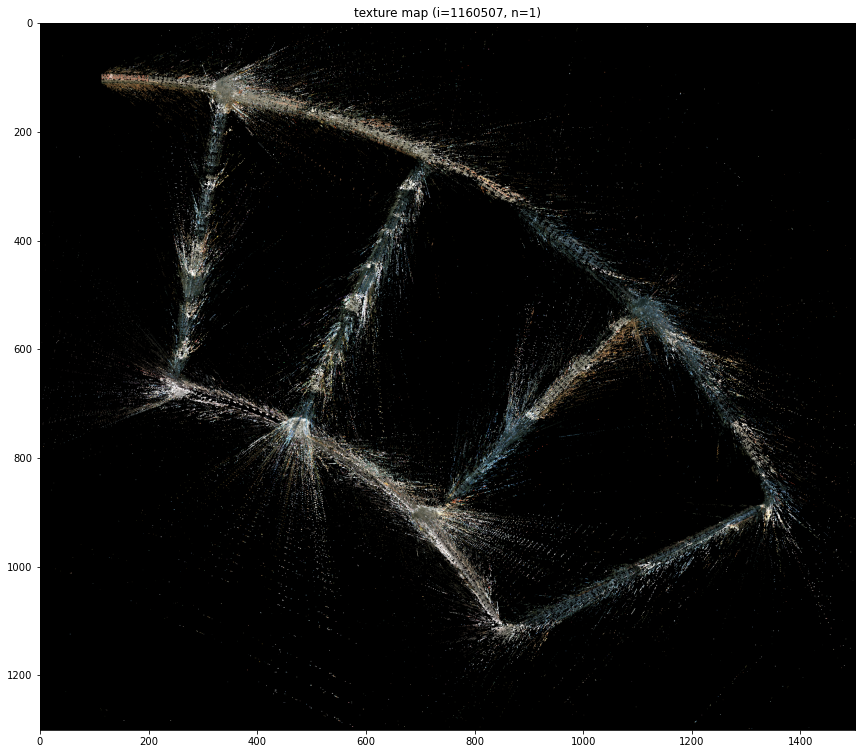

In [4]:
grid_map.plot_texture_map(i,1)

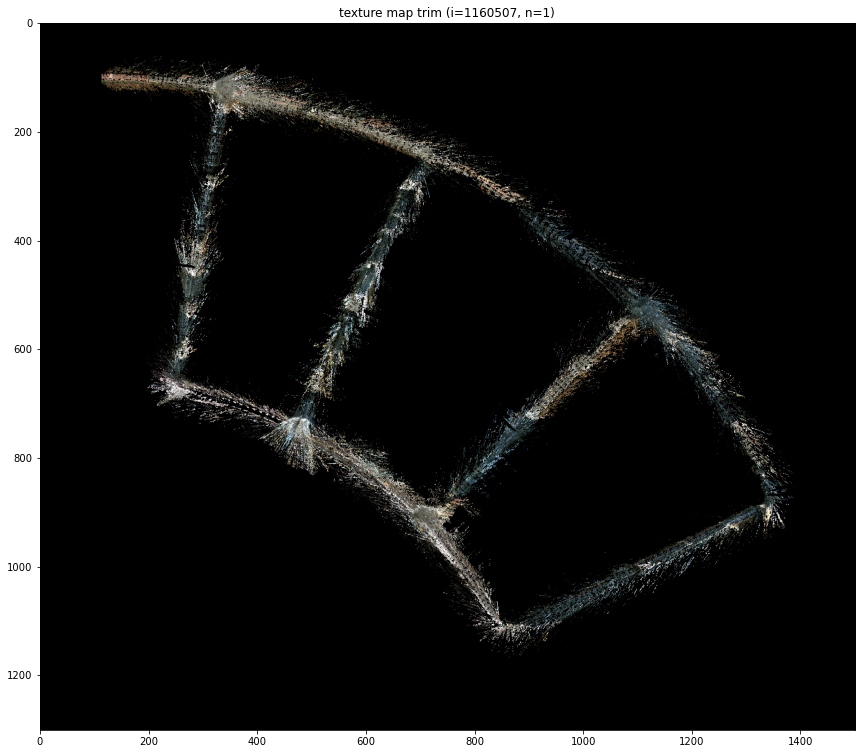

In [5]:
grid_map.plot_texture_map_trimmed(i,1)